<a href="https://colab.research.google.com/github/yohanesnuwara/pyMRST/blob/main/notebooks/pyMRST_water_incomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Incompressible Water Reservoir with PyMRST

In [1]:
# Clone pyMRST
!git clone https://github.com/yohanesnuwara/pyMRST

Cloning into 'pyMRST'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 273 (delta 70), reused 0 (delta 0), pack-reused 132
Receiving objects: 100% (273/273), 784.81 KiB | 3.09 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Add directory where you install PyMRST
import sys
sys.path.append("/content/pyMRST") 

import pymrst
from pymrst_units import *

In [3]:
# Setup PyMRST (Takes about 1 minute)
pymrst.setup()

In [4]:
from pymrst_units import *

# Geometry
nx, ny, nz = 30, 20, 10
lx, ly, lz = 30, 20, 10

# Reservoir property                                         
poro = dict({"type": "heterogeneous", 
             "field": "gaussian", 
             "min": 0.2, "max": 0.4, "std": 2.5})

k = dict({"type": "heterogeneous", 
          "field": "kozeny"})

ntg = dict({"type": "heterogeneous", 
            "field": "lognorm", 
            "min": 0.4, "max": 0.6})

rock = dict({"c": 1e-6/barsa(), # Rock compressibility at ref pressure, 1/bar to 1/Pa
             "p_r": 200*barsa()}) # Reference pressure, bar to Pa             

# Fluid property: 1-phase water
fluid = dict({"type": "water", 
              "mu": 1*centi()*poise(), # cp to Pa.s 
              "rho": 1014})

# Boundary 
bc_front = dict({"type": "fluxside", "value": 50*stb()/day()}) # bbl/d to m3/s
bc_back = dict({"type": "fluxside", "value": 0})
bc_left = dict({"type": "fluxside", "value": 100/day()}) # m3/d to m3/s
bc_right = dict({"type": "pside", "value": 100*barsa()}) # bar to Pa

# Well
cell_loc1 = np.arange(10+60, nx*ny*nz, nx*ny)
cell_loc2 = np.arange(nx, nx*ny, ny)

# well = dict({"cell_loc": [cell_loc1, cell_loc2], 
#              "type": ["rate", "bhp"], 
#              "value": [(-10*stb()/day()), (110*barsa())], # bbl/d to m3/s, bar to Pa 
#              "radius": [.1, .1],
#              "skin": [0, 0], 
#              "direction": [None, "y"],
#              "phase": [[1,0], [0,1]]}) # Phase  

# well = dict({"cell_loc": [cell_loc1], 
#              "type": ["rate"], 
#              "value": [(-10*stb()/day())], # bbl/d to m3/s, bar to Pa 
#              "radius": [.1],
#              "skin": [0], 
#              "direction": [None]})  

well = dict({"cell_loc": [cell_loc1], 
             "type": ["bhp"], 
             "value": [100*barsa()], # bbl/d to m3/s, bar to Pa 
             "radius": [.1],
             "skin": [0], 
             "direction": [None]})  

# Execute function
pymrst.write_input(nx, ny, nz, lx, ly, lz, poro, k, rock, fluid, well, 
                   bc_front, bc_back, bc_left, bc_right)

In [5]:
# Execute simulator
# Simulator results are added in new directory "result_water_1phase"
pymrst.water_1phase()

Computing one-sided transmissibilities...	Elapsed time is 0.0113828 seconds.
ans = 1


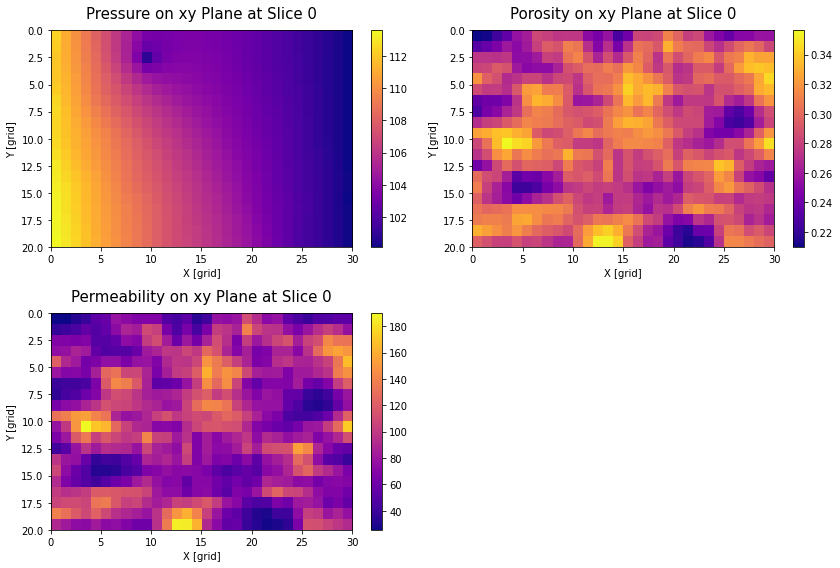

In [6]:
# Plot pressure, porosity, and permeability
plt.figure(figsize=(12,8))

# Inputs for plotting
directory = "/content/result_water_1phase"
filename = ["pressure.mat", "poro.mat", "perm.mat"]
plane, position = "xy", 0

# Plot
titles = ["Pressure", "Porosity", "Permeability"]

for i in range(3):
  plt.subplot(2,2,i+1)
  plt.title("{} on {} Plane at Slice {}".format(titles[i], plane, position),
          size=15, pad=12) 

  # Get cell data
  cube = pymrst.getCellData(directory, filename[i], dimension=(nx,ny,nz))

  # Convert units of pressure and permeability
  if i==0:
    # Convert metric (Pa) to field (psia)
    cube = cube/barsa()  
  if i==2:
    # Convert metric (Pa.s) to field (md)
    cube = cube/(milli()*darcy()) 

  # Plot cell data
  pymrst.plotCellData(cube, plane, position, cmap="plasma")

plt.tight_layout()
plt.show()